In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


We will begin with general research into the type of data we have chosen, and how it is made up.
We were given two data frames, one covering the dry statistics of each song, we names as sporitysongs.df, and the other dataframe of song info covering which playlist each song belonged to.

In [2]:
spotifysongs_df = pd.read_csv('song_data.csv')
song_info_df = pd.read_csv('song_info.csv') 

In [3]:


display(spotifysongs_df)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [4]:

print(song_info_df.shape)
display((song_info_df.head(10)))

(18835, 4)


,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems
5,Bring Me To Life,Evanescence,Fallen,00s Rock Anthems
6,Last Resort,Papa Roach,Infest,00s Rock Anthems
7,Are You Gonna Be My Girl,Jet,Get Born,00s Rock Anthems
8,Mr. Brightside,The Killers,Hot Fuss,00s Rock Anthems
9,Sex on Fire,Kings of Leon,Only By The Night,00s Rock Anthems


In [5]:
spotifysongs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
song_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    18835 non-null  object
 1   artist_name  18835 non-null  object
 2   album_names  18835 non-null  object
 3   playlist     18835 non-null  object
dtypes: object(4)
memory usage: 588.7+ KB


In [7]:
song_info_df.describe()

,song_name,artist_name,album_names,playlist
count,18835,18835,18835,18835
unique,13070,7564,12014,300
top,Better,Kanye West,Greatest Hits,Young & Free
freq,21,82,66,100


From Here we conclude that each DF is complete and covers 18835 records

In [8]:
song_info_df['playlist'].unique().shape

(300,)

In [9]:
print(song_info_df["song_name"].unique().shape)
spotifysongs_df['song_name'].unique().shape


(13070,)


(13070,)

Here we conclude that there seems to be doubles of songs

In [10]:
song_info_df['song_name'].value_counts().head(50)

Better                                            21
FEFE (feat. Nicki Minaj & Murda Beatz)            19
MIA (feat. Drake)                                 18
Taki Taki (with Selena Gomez, Ozuna & Cardi B)    18
No Stylist                                        17
I Love It (& Lil Pump)                            16
Electricity (with Dua Lipa)                       16
Promises (with Sam Smith)                         16
Mo Bamba                                          16
Sunflower - Spider-Man: Into the Spider-Verse     16
Lullaby                                           15
Love Someone                                      14
Fall                                              14
ZEZE (feat. Travis Scott & Offset)                14
Wake Up in the Sky                                14
Happier                                           14
Be Alright                                        14
Noticed                                           13
Without Me                                    

In [11]:
spotifysongs_df['song_name'].value_counts().head(50)

Better                                            21
FEFE (feat. Nicki Minaj & Murda Beatz)            19
MIA (feat. Drake)                                 18
Taki Taki (with Selena Gomez, Ozuna & Cardi B)    18
No Stylist                                        17
I Love It (& Lil Pump)                            16
Electricity (with Dua Lipa)                       16
Promises (with Sam Smith)                         16
Mo Bamba                                          16
Sunflower - Spider-Man: Into the Spider-Verse     16
Lullaby                                           15
Love Someone                                      14
Fall                                              14
ZEZE (feat. Travis Scott & Offset)                14
Wake Up in the Sky                                14
Happier                                           14
Be Alright                                        14
Noticed                                           13
Without Me                                    

In [12]:
song_info_df['song_name'].value_counts().shape

(13070,)

In [13]:
song_info_df.shape

(18835, 4)

In [14]:
song_info_df[song_info_df.song_name == 'FEFE (feat. Nicki Minaj & Murda Beatz)']


,song_name,artist_name,album_names,playlist
1258,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),A1 Hip-Hop
3391,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),Beast Mode
4328,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),Certified Gold
5627,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),Crowd Pleasers
6229,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),El Bloque
7460,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),Get Turnt
7601,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),Global Top 50
8637,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),HIIT-Hop
8719,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),Hip Hop Made Me
8768,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),Hip-Hop R&B Nation


In [15]:
spotifysongs_df[spotifysongs_df.song_name == 'FEFE (feat. Nicki Minaj & Murda Beatz)']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1258,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
3391,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
4328,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
5627,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
6229,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
7460,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
7601,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
8637,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
8719,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376
8768,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.088,0.931,0.387,0.0,1,0.136,-9.127,1,0.412,125.978,4,0.376


By looking at a given song that appears several times we conclude that the main douplication arrises in the dataframe of song info, mainly because one song appears under several playlists.

In [16]:
song_info_df_clean = song_info_df.drop_duplicates(subset=["song_name","artist_name","album_names"], keep='first', inplace=False, ignore_index=False)

In [17]:
song_info_df_clean

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems
...,...,...,...,...
18830,Let It Breathe,Water Liars,Water Liars,Your Favorite Coffeehouse
18831,Answers,Brooke Annibale,The Simple Fear,Your Favorite Coffeehouse
18832,Sudden Love (Acoustic),The Woodlands,"Parallels, Vol. II",Your Favorite Coffeehouse
18833,Gentle on My Mind,Robert Ellis,Dear John,Your Favorite Coffeehouse


In [18]:
spotifysongs_df_noduplicates = spotifysongs_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [19]:
spotifysongs_df_noduplicates.shape

(14926, 15)

In the DataFrame covering the dry statistics of each song we want to remove doubles, thus we did so, yet we discover that under the song-name there appear to remain doubles. we investigate further why such doubles still remain:

In [20]:
spotifysongs_df_noduplicates['song_name'].value_counts().head(60)

Heaven                        8
Fire                          8
Alright                       7
Fall                          7
Better                        7
You                           7
Breathe                       7
Gone                          7
Stay                          7
California                    6
Lullaby                       6
Easy                          6
Dreamer                       6
Move                          6
Higher                        6
Treat You Better              6
Alive                         6
Thunder                       6
Beautiful                     6
Home                          6
Seven Nation Army             5
Baby                          5
Honest                        5
Zombie                        5
Sorry                         5
With You                      5
Call Me                       5
Bang Bang                     5
Runnin'                       5
Trouble                       5
Halo                          5
Alone   

In [21]:
spotifysongs_df_noduplicates[spotifysongs_df_noduplicates.song_name == 'Fire']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
2701,Fire,46,174160,0.541000,0.439,0.882,0.671000,5,0.7930,-9.036,0,0.0870,138.551,4,0.317
5578,Fire,64,205617,0.263000,0.386,0.714,0.000000,6,0.2330,-5.597,0,0.3810,89.807,4,0.289
5728,Fire,44,271586,0.000007,0.501,0.770,0.842000,0,0.0929,-9.059,0,0.0252,132.007,4,0.639
6177,Fire,58,228571,0.000182,0.760,0.824,0.779000,11,0.0370,-4.898,0,0.0714,126.009,4,0.263
6307,Fire,49,197579,0.218000,0.551,0.613,0.000465,10,0.0782,-6.280,0,0.0315,108.364,4,0.450
6756,Fire,55,197749,0.006970,0.735,0.798,0.009680,9,0.1940,-3.829,0,0.0578,115.980,4,0.501
13173,Fire,52,182006,0.052600,0.516,0.860,0.000000,10,0.0858,-3.560,0,0.0494,173.874,4,0.350
16359,Fire,54,197522,0.242000,0.552,0.625,0.000558,10,0.0751,-6.053,0,0.0296,108.362,4,0.425


In [22]:
song_info_df[song_info_df.song_name == 'Fire']

,song_name,artist_name,album_names,playlist
2701,Fire,Arthur Brown,The Crazy World Of Arthur Brown,Alternative 60s
5578,Fire,Louis The Child,Fire,Creamy
5728,Fire,Ferry Corsten,L.E.F.,Dance Classics
6177,Fire,Magnificence,Fire,EDM Workout
6307,Fire,Barns Courtney,The Dull Drums - EP,Endorphin Rush
6756,Fire,Diskopunk,Fire,Feel-Good Indie Rock
11693,Fire,Magnificence,Fire,mint
13173,Fire,Matrix & Futurebound,Fire,Para Entrenar
16359,Fire,Barns Courtney,Fire,Swagger
18419,Fire,Louis The Child,Fire,Workday_ Pop


In [23]:
print(song_info_df_clean.shape)
spotifysongs_df_noduplicates.shape

(14615, 4)


(14926, 15)

Taking a random example, we infer that doubles exist because although the song name is identical, their "dry stats" are different and thus mean a different song, like a cover or something. 

We would like to represent this information somehow on our data as we move on to the next stages of inverstigations of ratings and coorelations as we believe the more playlists a song appears in might give us useful information. Yet our problem is that some songs are very similar, so we will build the aditional column that represents the number of playlists a given song is in.


Yet first we must make sure the data is clean of "real" duplcates. evidence of problematic collection of data

In [24]:
a = song_info_df.groupby(song_info_df.columns.tolist(),as_index=False).size()

In [25]:
a

,song_name,artist_name,album_names,playlist,size
0,"""40"" - Live Version 1983",U2,Under A Blood Red Sky,The '80s All Lined Up,1
1,"""45""",The Gaslight Anthem,Handwritten,Punk Rock Workout,1
2,"""99""",Barns Courtney,“99”,Rockin' Vibes,1
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",David Bowie,"Legacy (The Very Best Of David Bowie, Deluxe)",All Out 70s,1
4,#CaixaGang,AbJo,#VIBRA,NIKE RUNNING FASTEST MILE,1
...,...,...,...,...,...
18823,通過驗證,艾福杰尼,通過驗證,Chinese Hip-Hop Stars,1
18824,都市森林,Force嘟嘟,都市森林,Chinese Hip-Hop Stars,1
18825,비상연락음,IndEgo Aid,비상연락음,K-Hip-Hop Beats,1
18826,빨간 맛 Red Flavor,Red Velvet,The Red Summer - Summer Mini Album,Fantastic K-Workout,1


In [26]:
filt = a['size'] > 1
k = a[filt]
duplicate_titles = list(k['song_name'])

In [27]:
k

,song_name,artist_name,album_names,playlist,size
305,99 Pace,Blay Vision,The Vision 2,Grime Instrumentals,2
4082,Divine,Jana Rush,Pariah,Footwork Fever,2
5257,Fast Car,Jonas Blue,Fast Car,Hit Rewind,2
9489,Look Up Child,Lauren Daigle,Look Up Child,Everyday Favorites,2
11379,No Promises (feat. Demi Lovato),Cheat Codes,No Promises (feat. Demi Lovato),Workday_ Pop,2
11542,Nothing To Be Done,The Pastels,Truckload Of Trouble,Early Alternative,2
17209,Waiting For Love,Avicii,Waiting For Love,Spin Fit,2


In [28]:
display(song_info_df[song_info_df.song_name == 'No Promises (feat. Demi Lovato)'])
song_info_df[song_info_df.song_name == 'Fast Car']

,song_name,artist_name,album_names,playlist
11377,No Promises (feat. Demi Lovato),Cheat Codes,No Promises (feat. Demi Lovato),Mega Hit Mix
18378,No Promises (feat. Demi Lovato),Cheat Codes,No Promises (feat. Demi Lovato),Workday_ Pop
18446,No Promises (feat. Demi Lovato),Cheat Codes,No Promises (feat. Demi Lovato),Workday_ Pop


,song_name,artist_name,album_names,playlist
354,Fast Car,Tracy Chapman,Tracy Chapman,70s & 80s Acoustic
2284,Fast Car,Tracy Chapman,Tracy Chapman,All Out 80s
7766,Fast Car,Tracy Chapman,Tracy Chapman,Good Times_ Great Oldies
8813,Fast Car,Jonas Blue,Fast Car,Hit Rewind
8817,Fast Car,Jonas Blue,Fast Car,Hit Rewind
18426,Fast Car,Jonas Blue,Fast Car,Workday_ Pop


In [29]:
display(spotifysongs_df[spotifysongs_df.song_name == '99 Pace'])
display(spotifysongs_df[spotifysongs_df.song_name == 'Divine'])
display(spotifysongs_df[spotifysongs_df.song_name == 'Fast Car'])
display(spotifysongs_df[spotifysongs_df.song_name == 'No Promises (feat. Demi Lovato)'])
display(spotifysongs_df[spotifysongs_df.song_name == 'Nothing To Be Done'])
display(spotifysongs_df[spotifysongs_df.song_name == 'Waiting For Love'])
display(spotifysongs_df[spotifysongs_df.song_name == 'Look Up Child'])
#  'Divine' or
#  'Fast Car' or
#  'Look Up Child' or
#  'No Promises (feat. Demi Lovato)' or
#  'Nothing To Be Done' or
#  'Waiting For Love']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7938,99 Pace,23,197147,0.0412,0.661,0.783,0.895,11,0.307,-8.987,1,0.0425,139.966,4,0.0689
7939,99 Pace,0,197147,0.0412,0.661,0.783,0.895,11,0.307,-8.987,1,0.0425,139.966,4,0.0689


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7074,Divine,20,344618,0.114,0.478,0.769,0.906,8,0.098,-9.144,1,0.141,148.749,1,0.291
7093,Divine,0,344618,0.114,0.478,0.769,0.906,8,0.098,-9.144,1,0.141,148.749,1,0.291


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
354,Fast Car,79,296800,0.313,0.711,0.292,0.0,4,0.131,-15.523,0,0.0370,103.951,4,0.194
2284,Fast Car,79,296800,0.313,0.711,0.292,0.0,4,0.131,-15.523,0,0.0370,103.951,4,0.194
7766,Fast Car,79,296800,0.313,0.711,0.292,0.0,4,0.131,-15.523,0,0.0370,103.951,4,0.194
8813,Fast Car,41,212424,0.453,0.459,0.587,0.0,9,0.307,-6.983,1,0.0785,113.901,4,0.581
8817,Fast Car,81,212424,0.455,0.560,0.592,0.0,9,0.297,-6.951,1,0.0544,112.684,4,0.564
18426,Fast Car,81,212424,0.455,0.560,0.592,0.0,9,0.297,-6.951,1,0.0544,112.684,4,0.564


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
11377,No Promises (feat. Demi Lovato),77,223503,0.0575,0.741,0.667,0.0,10,0.106,-5.445,1,0.134,112.956,4,0.595
18378,No Promises (feat. Demi Lovato),77,223503,0.0575,0.741,0.667,0.0,10,0.106,-5.445,1,0.134,112.956,4,0.595
18446,No Promises (feat. Demi Lovato),72,222786,0.0572,0.739,0.619,0.0,10,0.105,-6.669,1,0.162,112.961,4,0.580


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
6059,Nothing To Be Done,45,232133,0.00144,0.349,0.896,0.73,9,0.287,-10.59,1,0.106,141.72,4,0.481
6094,Nothing To Be Done,3,232133,0.00144,0.349,0.896,0.73,9,0.287,-10.59,1,0.106,141.72,4,0.481


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
6991,Waiting For Love,16,228750,0.335,0.567,0.746,0.0,6,0.392,-3.748,0,0.0511,128.030,4,0.578
13793,Waiting For Love,43,230613,0.298,0.577,0.741,0.0,6,0.142,-3.830,0,0.0501,128.081,4,0.581
16128,Waiting For Love,16,228750,0.335,0.567,0.746,0.0,6,0.392,-3.748,0,0.0511,128.030,4,0.578
16142,Waiting For Love,8,228750,0.299,0.575,0.750,0.0,6,0.268,-3.798,0,0.0438,128.091,4,0.609


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
6498,Look Up Child,72,183013,0.414,0.733,0.589,0.000001,2,0.14,-5.303,1,0.0381,91.003,4,0.651
6510,Look Up Child,64,183013,0.414,0.733,0.589,0.000001,2,0.14,-5.303,1,0.0381,91.003,4,0.651
7158,Look Up Child,64,183013,0.414,0.733,0.589,0.000001,2,0.14,-5.303,1,0.0381,91.003,4,0.651
13654,Look Up Child,64,183013,0.414,0.733,0.589,0.000001,2,0.14,-5.303,1,0.0381,91.003,4,0.651


In this stage we looked into the discrepencies in the Data, we noticed 7 songs that appear twice under the same name and same playlist. Through this surface level investigation we concluded that these represent a measurment bias in the collection of the data. Some songs are identical in every statistic yet differ in just one statistic such as the songs "Divine" and "99 Pace" which could mean a mistake. Yet in other cases the songs are different in their stats and may represent two versions of the same song, and thus constitute different songs alltogether. Because we cannot tell 100% what the cause of these disrepencies are, and more importantly these only represent 7 records out of about 14,900 unique song records we decided to ignore them and move on, because in any case these disrepencies should not have any sygnificant effect on our further investigation.

In [30]:
spotifysongs_final = spotifysongs_df.groupby(spotifysongs_df.columns.tolist(),as_index=False).size()

In [31]:
display(spotifysongs_final)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,size
0,"""40"" - Live Version 1983",1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286,1
1,"""45""",48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423,1
2,"""99""",67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714,1
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584,1
4,#CaixaGang,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,40,217981,0.377000,0.730,0.809,0.000000,4,0.0821,-5.550,0,0.1690,108.957,4,0.516,1
14922,都市森林,24,210742,0.194000,0.612,0.536,0.000000,10,0.1250,-12.150,0,0.2490,164.058,4,0.386,1
14923,비상연락음,37,181285,0.743000,0.430,0.874,0.000000,8,0.4250,-4.571,1,0.2700,140.945,4,0.391,1
14924,빨간 맛 Red Flavor,72,191139,0.040900,0.709,0.917,0.000000,9,0.0839,-3.315,1,0.1890,125.042,4,0.515,1


In [32]:

spotifysongs_final[spotifysongs_final.song_name == 'Fire']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,size
4354,Fire,44,271586,0.000007,0.501,0.770,0.842000,0,0.0929,-9.059,0,0.0252,132.007,4,0.639,1
4355,Fire,46,174160,0.541000,0.439,0.882,0.671000,5,0.7930,-9.036,0,0.0870,138.551,4,0.317,1
4356,Fire,49,197579,0.218000,0.551,0.613,0.000465,10,0.0782,-6.280,0,0.0315,108.364,4,0.450,1
4357,Fire,52,182006,0.052600,0.516,0.860,0.000000,10,0.0858,-3.560,0,0.0494,173.874,4,0.350,1
4358,Fire,54,197522,0.242000,0.552,0.625,0.000558,10,0.0751,-6.053,0,0.0296,108.362,4,0.425,1
4359,Fire,55,197749,0.006970,0.735,0.798,0.009680,9,0.1940,-3.829,0,0.0578,115.980,4,0.501,1
4360,Fire,58,228571,0.000182,0.760,0.824,0.779000,11,0.0370,-4.898,0,0.0714,126.009,4,0.263,2
4361,Fire,64,205617,0.263000,0.386,0.714,0.000000,6,0.2330,-5.597,0,0.3810,89.807,4,0.289,2


In [33]:
spotifysongs_df[spotifysongs_df.song_name == 'Fire']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
2701,Fire,46,174160,0.541000,0.439,0.882,0.671000,5,0.7930,-9.036,0,0.0870,138.551,4,0.317
5578,Fire,64,205617,0.263000,0.386,0.714,0.000000,6,0.2330,-5.597,0,0.3810,89.807,4,0.289
5728,Fire,44,271586,0.000007,0.501,0.770,0.842000,0,0.0929,-9.059,0,0.0252,132.007,4,0.639
6177,Fire,58,228571,0.000182,0.760,0.824,0.779000,11,0.0370,-4.898,0,0.0714,126.009,4,0.263
6307,Fire,49,197579,0.218000,0.551,0.613,0.000465,10,0.0782,-6.280,0,0.0315,108.364,4,0.450
6756,Fire,55,197749,0.006970,0.735,0.798,0.009680,9,0.1940,-3.829,0,0.0578,115.980,4,0.501
11693,Fire,58,228571,0.000182,0.760,0.824,0.779000,11,0.0370,-4.898,0,0.0714,126.009,4,0.263
13173,Fire,52,182006,0.052600,0.516,0.860,0.000000,10,0.0858,-3.560,0,0.0494,173.874,4,0.350
16359,Fire,54,197522,0.242000,0.552,0.625,0.000558,10,0.0751,-6.053,0,0.0296,108.362,4,0.425
18419,Fire,64,205617,0.263000,0.386,0.714,0.000000,6,0.2330,-5.597,0,0.3810,89.807,4,0.289


In [34]:
print(spotifysongs_final.shape)
spotifysongs_final


(14926, 16)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,size
0,"""40"" - Live Version 1983",1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286,1
1,"""45""",48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423,1
2,"""99""",67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714,1
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584,1
4,#CaixaGang,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,40,217981,0.377000,0.730,0.809,0.000000,4,0.0821,-5.550,0,0.1690,108.957,4,0.516,1
14922,都市森林,24,210742,0.194000,0.612,0.536,0.000000,10,0.1250,-12.150,0,0.2490,164.058,4,0.386,1
14923,비상연락음,37,181285,0.743000,0.430,0.874,0.000000,8,0.4250,-4.571,1,0.2700,140.945,4,0.391,1
14924,빨간 맛 Red Flavor,72,191139,0.040900,0.709,0.917,0.000000,9,0.0839,-3.315,1,0.1890,125.042,4,0.515,1


In this stage we have reached a target dataframe we are satisfied with because it includes a 16th column "size" which represents the number of playlists a given song has appeared in and from this we can ask, are songs that appear in more than one playlist more populare than others? or we can investigate certain correlations

# 1
a. We chose the dataset of 18835 spotify songs. 
b. The data set came in two parts, the first 18835 records of songs and their dry statistics such as song duration, danceability, instrumentalness and so on. The second part of the data set, song_info contained information on each song, the genre, album, artist, and the playlist it appeared in. The songs where taken from a collection of 300 unique playlists. We do not how these playlists where chosen, or how certain metrics such as danceability and popularity where measured yet we take them at face value. Given this information we cannot say this is a fair sample of the general spotify song library as the playlists chosen could amout to some level of subjective bias. (from a glance many of the playlist names seem western, or with bombastic names such as "United States top 50". Hinting that these songs might represent a specific segment of the general spotify library.
In Adition the question of measurment bias arrises when trying to understand who or what decides the songs popularity or danceability grade. As we have no information on these issues we take it them all at face value and move on.



c. Our dataframe has 16 + 3 features if we include the second dataframe which we used to synthesize an additional piece of information the 'size' which represents The number of appearances in playlists a song has made. The features are as follows:
song_name, artist_name, album_names, playlist, song_popularity, song_duration_ms, acousticness, danceability, energy , instrumentalness, key, liveness, loudness, audio_mode, speechiness, tempo, time_signature, audio_valence, size*.  

In [35]:
print(song_info_df.info())
spotifysongs_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    18835 non-null  object
 1   artist_name  18835 non-null  object
 2   album_names  18835 non-null  object
 3   playlist     18835 non-null  object
dtypes: object(4)
memory usage: 588.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14926 entries, 0 to 14925
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14926 non-null  object 
 1   song_popularity   14926 non-null  int64  
 2   song_duration_ms  14926 non-null  int64  
 3   acousticness      14926 non-null  float64
 4   danceability      14926 non-null  float64
 5   energy            14926 non-null  float64
 6   instrumentalness  14926 non-null  float64
 7   key               14926 non-null  int64  
 8   liveness       

d. The number of original records in the datases constituted 18835 songs, after synthesizing the 2 dataframes, cleaning and conbining the songs that appeared several times we reached a lean dataframe which has 14926 unique (as much as possible*) records. 

*because we noticed that the only time a song is identical in name, album, and artist and playlist, there are 7 such examples and we talked about them during our synthesis. In the case where songs have the same name, album, and artist yet have different "music stats" we considered them two different songs, such as a cover of a song. Therefore we decided to define a song as identical if it has the same "music stats".

## 2, Exploritory data analysis.


Before we begin, we must say that although we do not have enough information on the dataset to assume it is a representative sample of the spotify library, we will treat it as such for the purpose of this study.

In [36]:
# distribution of popularity, danceability, size, song_duration_ms, speechiness, 

In [37]:
spotifysongs_final.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,size
count,14926.000000,1.492600e+04,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,2.189496e+05,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967,1.261892
std,20.379465,6.234080e+04,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758,0.922209
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,37.000000,1.839435e+05,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000,1.000000
50%,52.000000,2.118455e+05,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000,1.000000
75%,63.750000,2.447200e+05,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750,1.000000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000,19.000000


We are interested in looking at the distribution of speechiness, how many songs have words? are songs with words more common than those without?


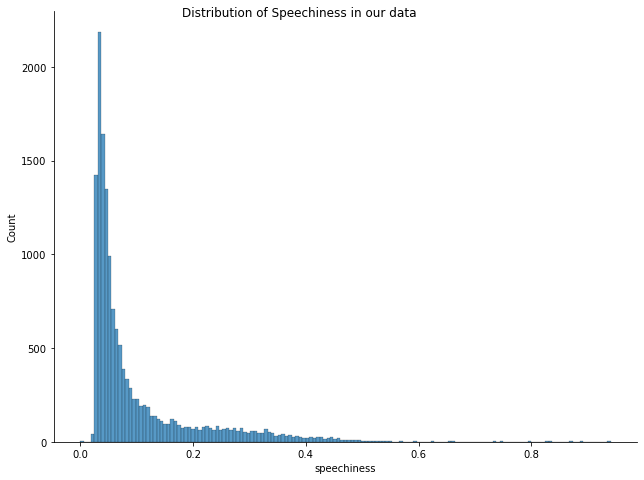

In [38]:
facetgrid_obj = sns.displot(data=spotifysongs_final, x='speechiness')
facetgrid_obj.fig.suptitle('Distribution of Speechiness in our data')
facetgrid_obj.fig.set_size_inches(10, 7)


In [39]:
print(spotifysongs_final.speechiness.mean())

0.09941880611014321


We can see that songs are distributed uneavenly towards less speech in songs. 

The mean popularity score of our song is:  52.99187682505973


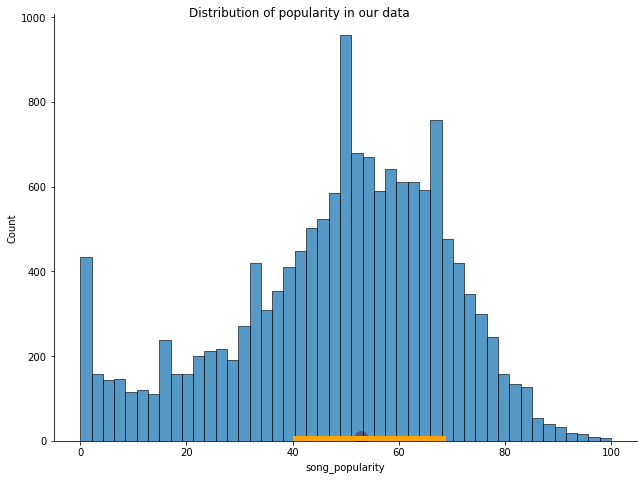

In [40]:
facetgrid_obj2 = sns.displot(data=spotifysongs_final, x='song_popularity')
facetgrid_obj2.fig.suptitle('Distribution of popularity in our data')
facetgrid_obj2.fig.set_size_inches(10, 7)
left_end = spotifysongs_df['song_popularity'].quantile(0.25)
right_end = spotifysongs_df['song_popularity'].quantile(0.75)
mean_popularity = spotifysongs_df['song_popularity'].mean()
facetgrid_obj2.axes[0, 0].scatter(mean_popularity, 10, s=150, color='red')
facetgrid_obj2.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=10); 
print("The mean popularity score of our song is: " , float(mean_popularity))


This helps us see how songs are generally ranked between 0-100, The interquatrile range of songs is shown in orange, and we notice that the mean popularity of the songs in our darabase is 53%. 

Next we are curious to see just how many songs get to appear in more than one playlist

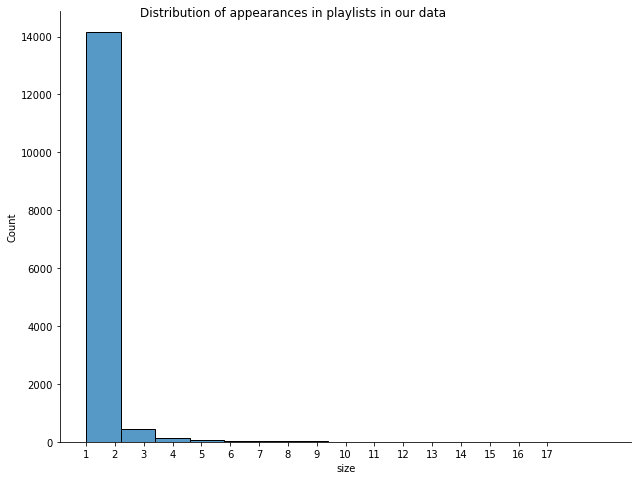

In [41]:
facetgrid_obj2 = sns.displot(data=spotifysongs_final, x='size')
facetgrid_obj2.fig.suptitle('Distribution of appearances in playlists in our data')
facetgrid_obj2.axes[0, 0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
facetgrid_obj2.fig.set_size_inches(10, 7)


We can see that the majority of songs appear in just one playlist we are interested in looking at how many songs appear in more than one playlist.

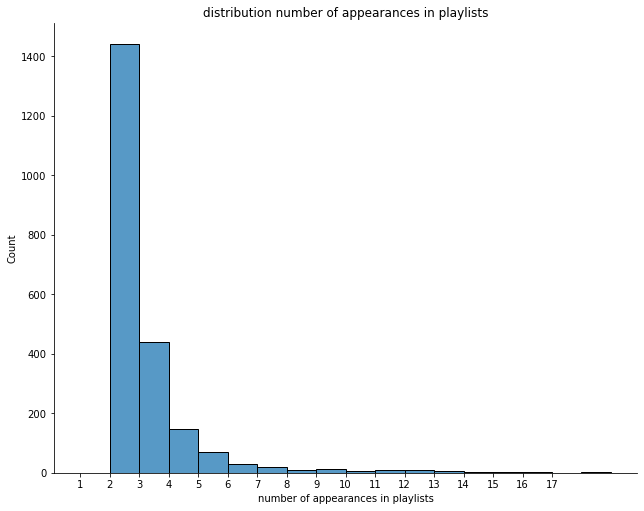

In [42]:
l = list(spotifysongs_final["size"])

filtered_numbers = [number for number in l if number > 1]
facetgrid_obj2 = sns.displot(filtered_numbers, bins=np.unique((l)))
facetgrid_obj2.set(title = "distribution number of appearances in playlists", xlabel = "number of appearances in playlists")
facetgrid_obj2.axes[0, 0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
facetgrid_obj2.fig.set_size_inches(10, 7)


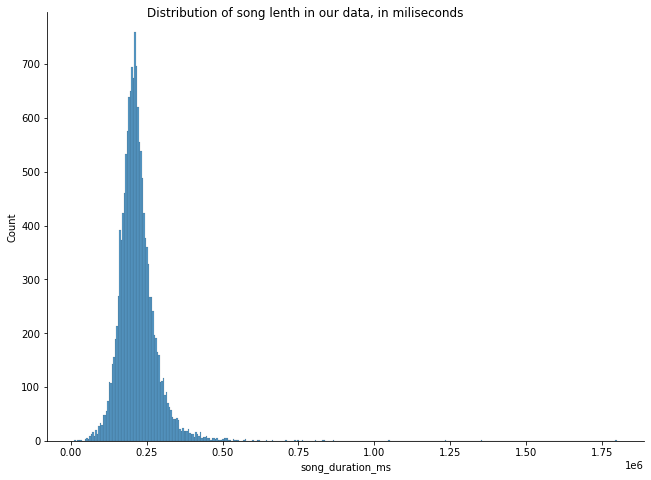

In [43]:
facetgrid_obj = sns.displot(data=spotifysongs_final, x='song_duration_ms')
facetgrid_obj.fig.suptitle('Distribution of song lenth in our data, in miliseconds')
facetgrid_obj.fig.set_size_inches(10, 7)

Seems like songs are distributed mostly around the value of 0.25*10^6 ms

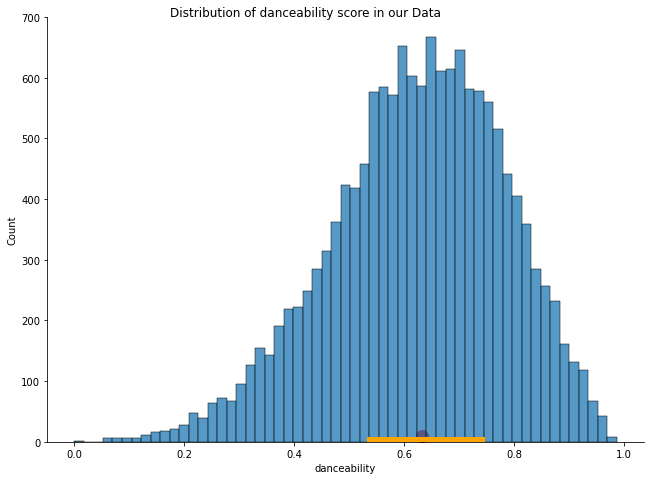

In [44]:
facetgrid_obj = sns.displot(data=spotifysongs_final, x='danceability')
facetgrid_obj.fig.suptitle('Distribution of danceability score in our Data')
facetgrid_obj.fig.set_size_inches(10, 7)
left_end = spotifysongs_df['danceability'].quantile(0.25)
right_end = spotifysongs_df['danceability'].quantile(0.75)
mean_danceability = spotifysongs_df['danceability'].mean()
facetgrid_obj.axes[0, 0].scatter(mean_danceability, 10, s=150, color='red')
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=10);  
# show line of interquartile range, values between 25 and 75 percentiles




Above we see the interquartile range of danceability drawn by an orange line, and the mean shown by a red dot.

We want to investigate the coorelation between size and popularity.

[Text(0.5, 1.0, '# of appearances in playlists vs Popularity correlation'),
 Text(0.5, 0, '# of appearances in playlists'),
 Text(0, 0.5, 'popularity rating')]

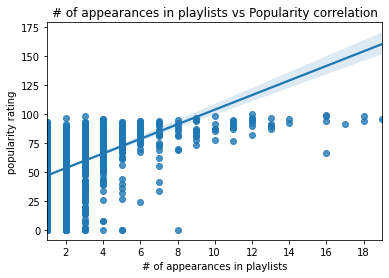

In [45]:
facetgrid_obj = sns.regplot( x="size", y="song_popularity", data=spotifysongs_final)
facetgrid_obj.set(title='# of appearances in playlists vs Popularity correlation', xlabel='# of appearances in playlists',ylabel = 'popularity rating' )




Clearly we can see the trend line shows there is a positive correlation between the popularity of the song and the number of appearances it makes in playlists

Next we want to see a coorelation between danceability and liveness of a song. We expect more lively songs to be more danceable

[Text(0.5, 1.0, 'Energy vs Popularity correlation'),
 Text(0.5, 0, 'danceability'),
 Text(0, 0.5, 'energy')]

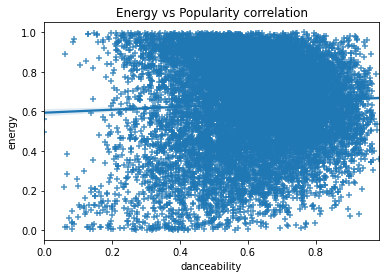

In [46]:
facetgrid_obj = sns.regplot( x="danceability", y="energy", data=spotifysongs_final, marker = '+')
facetgrid_obj.set(title='Energy vs Popularity correlation', xlabel='danceability',ylabel = 'energy' )



Although it is a very stuffed graph, in contradiction to what we expected the coorelation line is relatively neutral, with a slight positive angle to it.
Below we can see a cleaner version of the graph given above. We can say that having a more energetic song on average does not necessarily mean these songs are more popular, maybe only slightly.

Danceability vs Energy Correlation Plot


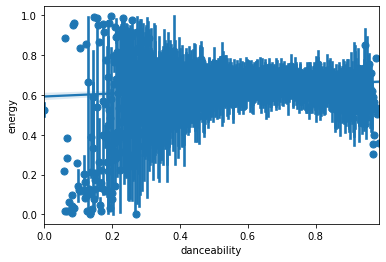

In [47]:
print("Danceability vs Energy Correlation Plot")
ax = sns.regplot(x="danceability", y="energy", data=spotifysongs_final,
                 x_estimator=np.mean)


Now in general we want to see a heatmap of the correlations of the different varriables. We will begin by normalizing the data we have.

In [48]:
encoded_df = spotifysongs_final.drop(columns="song_name")
encoded_df


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,size
0,1,225440,0.109000,0.257,0.472,0.000945,8,0.8290,-16.259,1,0.0399,143.517,4,0.286,1
1,48,202493,0.000696,0.315,0.970,0.000000,8,0.2770,-4.709,1,0.1020,178.068,4,0.423,1
2,67,199413,0.005980,0.552,0.804,0.000000,8,0.1110,-4.299,1,0.0303,95.980,4,0.714,1
3,58,213813,0.016000,0.502,0.681,0.107000,7,0.1020,-8.263,1,0.0276,112.160,4,0.584,1
4,10,208484,0.612000,0.697,0.907,0.282000,3,0.0624,-5.130,1,0.0920,98.953,4,0.542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,40,217981,0.377000,0.730,0.809,0.000000,4,0.0821,-5.550,0,0.1690,108.957,4,0.516,1
14922,24,210742,0.194000,0.612,0.536,0.000000,10,0.1250,-12.150,0,0.2490,164.058,4,0.386,1
14923,37,181285,0.743000,0.430,0.874,0.000000,8,0.4250,-4.571,1,0.2700,140.945,4,0.391,1
14924,72,191139,0.040900,0.709,0.917,0.000000,9,0.0839,-3.315,1,0.1890,125.042,4,0.515,1


In [49]:
from sklearn.preprocessing import  MinMaxScaler
cols_to_norm = list(encoded_df.columns)
encoded_df[cols_to_norm] =  MinMaxScaler().fit_transform(encoded_df[cols_to_norm])
encoded_df

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,size
0,0.01,0.119417,0.109437,0.260385,0.471907,0.000948,0.727273,0.838991,0.557802,1.0,0.042402,0.592267,0.8,0.290650,0.0
1,0.48,0.106579,0.000698,0.319149,0.970940,0.000000,0.727273,0.272895,0.844026,1.0,0.108395,0.734853,0.8,0.429878,0.0
2,0.67,0.104855,0.006003,0.559271,0.804596,0.000000,0.727273,0.102656,0.854187,1.0,0.032200,0.396091,0.8,0.725610,0.0
3,0.58,0.112912,0.016063,0.508612,0.681340,0.107322,0.636364,0.093426,0.755954,1.0,0.029330,0.462863,0.8,0.593496,0.0
4,0.10,0.109931,0.614457,0.706180,0.907809,0.282849,0.272727,0.052815,0.833594,1.0,0.097768,0.408360,0.8,0.550813,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,0.40,0.115244,0.378513,0.739615,0.809606,0.000000,0.363636,0.073018,0.823185,0.0,0.179596,0.449645,0.8,0.524390,0.0
14922,0.24,0.111194,0.194778,0.620061,0.536040,0.000000,0.909091,0.117014,0.659629,0.0,0.264612,0.677036,0.8,0.392276,0.0
14923,0.37,0.094713,0.745984,0.435664,0.874741,0.000000,0.727273,0.424674,0.847446,1.0,0.286929,0.581653,0.8,0.397358,0.0
14924,0.72,0.100226,0.041063,0.718338,0.917830,0.000000,0.818182,0.074864,0.878572,1.0,0.200850,0.516024,0.8,0.523374,0.0


We have a normalized dataset above which we will use to build a heatmap

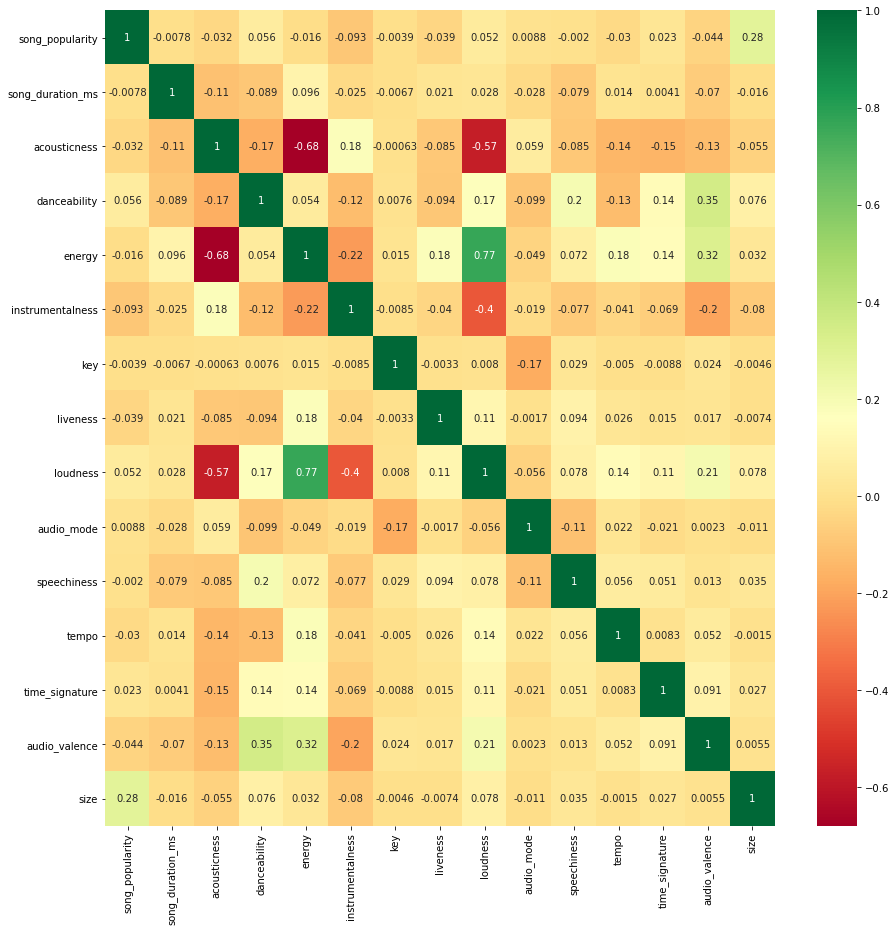

In [50]:
correlations = encoded_df.corr()

#plot heat map
plt.figure(figsize=(15,15))
g=sns.heatmap(encoded_df.corr(),annot=True,cmap="RdYlGn")

Looking at this heatmap we are surprised to see far fewer coorelations than we expected. The main ones that pop out are loudness vs acousticness which have a negative coorelation, loudness and energy have a strong positive coorelation to name a few. Yet we are surprised to see size (number of appearances in playlists) and song popularity have a low positive correlation. We might assume this is because of the base rate neglect, that the vast majority of songs appear in only one playlist, and thus skew the overall correlation. We would like to further investigate this.
In general though, we can see that popularity is relatively neutrally correlated with all the categories.
This is interesting to note, as it will make it harder to make a prediction on a songs popularity using just these categories.

In [51]:
encoded_df['size'].min()

0.0

In [52]:
filt = encoded_df['size'] > 0
song_in_several_playlists = encoded_df[filt]
display(song_in_several_playlists.head(8))
print(song_in_several_playlists.shape)
print("The popularity mean of songs that appear in more than one playlist is: ",song_in_several_playlists['song_popularity'].mean())
print("The mean song popularity score of the general database is: " , encoded_df['song_popularity'].mean())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,size
11,0.85,0.159954,0.076003,0.579534,0.853697,0.000000,0.090909,0.070659,0.881347,1.0,0.230606,0.706910,0.8,0.103659,0.111111
13,0.76,0.165676,0.002911,0.337386,0.927851,0.000212,0.818182,0.293406,0.748841,0.0,0.077896,0.583820,0.8,0.388211,0.055556
34,0.71,0.063468,0.629518,0.700101,0.506979,0.000000,1.000000,0.457492,0.707209,1.0,0.036451,0.530369,0.8,0.899390,0.111111
38,0.73,0.094591,0.176706,0.639311,0.690359,0.000000,0.181818,0.112911,0.795282,1.0,0.056429,0.390289,0.8,0.953252,0.222222
43,0.78,0.111375,0.202810,0.768997,0.699378,0.000131,0.000000,0.443134,0.818353,0.0,0.032625,0.383628,0.8,0.921748,0.055556
49,0.76,0.111815,0.405622,0.637285,0.601174,0.000000,0.909091,0.048508,0.774664,0.0,0.328374,0.825036,0.8,0.621951,0.055556
51,0.88,0.106038,0.165662,0.802432,0.895784,0.000000,0.090909,0.040201,0.883602,0.0,0.062593,0.391915,0.8,0.806911,0.111111
54,0.86,0.133255,0.572289,0.628166,0.574118,0.000000,0.454545,0.183673,0.767725,0.0,0.050903,0.412768,0.8,0.357724,0.166667


(2205, 15)
The popularity mean of songs that appear in more than one playlist is:  0.6340226757369621
The mean song popularity score of the general database is:  0.4875090446201261


In the above dataframe we filtered out all the songs that appeared in just one playlist, we have 2205 songs in total that appeared in more than one playlist.

# 3. Hypothesis. 
The question we are interested in answering is: are songs that appear in more than one playlist given a higher popularity score? The reason we are interested in this question is that we are trying to find the clues to what makes a song more popular. What makes one song vs another that have very similar "dry stats" more popular? Through our research Spotify's popularity rating is very much connected to how much a song is streamed. If a song is in more playlists it makes sense it is subject to more streams and thus more popular. We want to test this and see if it is true or not. If we look at the Correlation Heatmap, the correlation between the two is not so clear, thus we reach our null hypothesis.


$H_{0}$: - Our null hypothesis is: 

    There is no difference in the the mean popularity score of songs which appear in more than one playlist in comparison with the general dataset popularity mean. Thus we expect the value 0 to appear within our 95% confidence interval in the distribution of the difference between the bootstrapped means of songs which appear in more than one playlist and the general dataset bootstrapped mean.
    

$H_{1}$:- Our alternative hypothesis is:

    With atleast 95% cetrainty we can say that there is a difference in popularity scores between the general library and the sample of those songs which appear in more than one playlist.

The way we will test this hypothesis by using the bootstrap mean-difference method on the popularity mean of the bootstrapped sample of the filtered dataset we created called "song_in_several_playlists" minus bootstrapped popularity mean of the general dataset. We will show the confidence interval of 95% on the distribution of the bootstrapped means difference and if the the value 0 falls outside of this range we will rule against our null hypothesis.

In [53]:

def bootstrap_mean(original_sample, column_name):
     
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]]
    
    bootstrap_sample = original_sample_var_of_interest.sample(original_sample_size, replace=True) # note: WITH REPLACEMENT!
    resampled_mean = bootstrap_sample.mean()
    
    return resampled_mean

def bootstrap_mean_difference(original_sample, column_name, num_replications):
    
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        bootstrap_sample_mean = bootstrap_sample.mean()
        resampled_mean_diff = bootstrap_sample_mean - bootstrap_mean(encoded_df, column_name)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

In [54]:
means_bootstrapped = bootstrap_mean_difference(song_in_several_playlists, 'song_popularity', 10000)

lower value:  0.13776829486540382
upper value:  0.1551663149694169


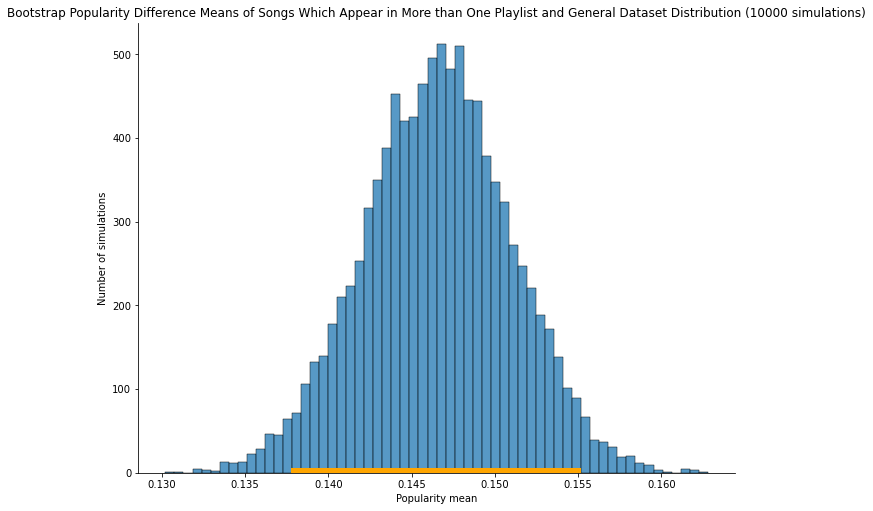

In [55]:
facetgrid_obj = sns.displot(means_bootstrapped)
facetgrid_obj.set(title='Bootstrap Popularity Difference Means of Songs Which Appear in More than One Playlist and General Dataset Distribution (10000 simulations)', xlabel='Popularity mean', ylabel='Number of simulations');
left_end = np.percentile(means_bootstrapped, 2.5, interpolation='higher')
right_end =  np.percentile(means_bootstrapped, 97.5, interpolation='higher')
print('lower value: ', left_end)
print('upper value: ', right_end)
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=10);
#plt.scatter(encoded_df['song_popularity'].mean(), 0, marker='*', s=500, color='red', clip_on=False)


The red star marks the our H0 expected value


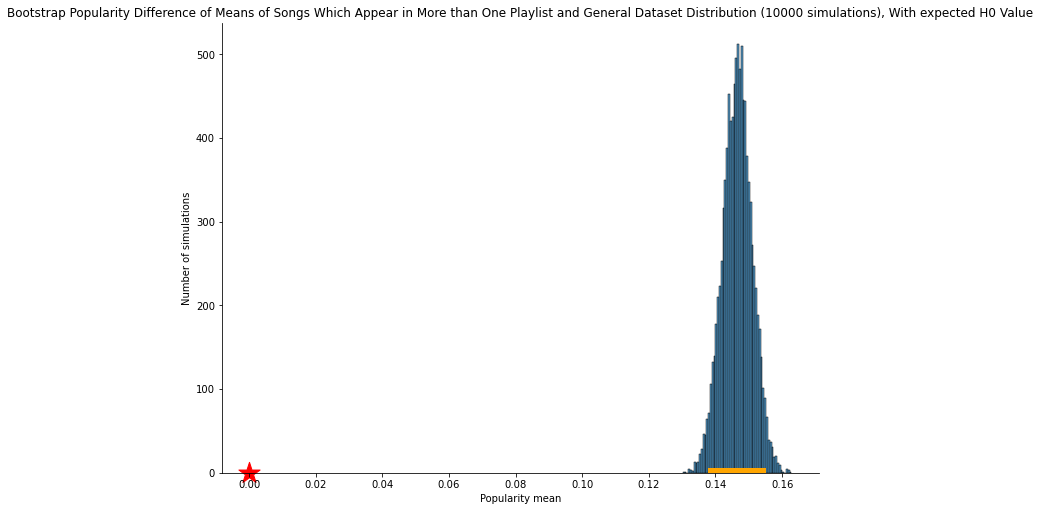

In [56]:
facetgrid_obj = sns.displot(means_bootstrapped)
facetgrid_obj.set(title='Bootstrap Popularity Difference of Means of Songs Which Appear in More than One Playlist and General Dataset Distribution (10000 simulations), With expected H0 Value', xlabel='Popularity mean', ylabel='Number of simulations');
left_end = np.percentile(means_bootstrapped, 2.5, interpolation='higher')
right_end =  np.percentile(means_bootstrapped, 97.5, interpolation='higher')

facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=10);
plt.scatter(0, 0, marker='*', s=500, color='red', clip_on=False)
print("The red star marks the our H0 expected value")



Above We can clearly see that the mean popularity ranking of the songs that appear in more than one playlist is most definatly higher than the popularity ranking of the general dataset of spotify songs (because our distribution curve is greater than zero). Therefore reject our null hypothesis.


We would like to add that the P-Value (the chance that we have wrongly rejected our null hypothesis), being the number of simulations to the left of the red star divided by the total number of simulations is clearly approaching 0 just by looking at the graph.

# 4.  Predicting Popularity
In this next stage we would like to further investigate ways in which we can predict a songs popularity. Because we have shown in the heat map in the previous stage that popularity is relatively neutrally correlated with almost all features. We have shown however that a song which appears in more than one playlist is a strong indicator to a higher popularity, we guess this correlation was not so clear because we are talking about only a small number of songs, a type of base rate neglect. 
We need to find a new category that might help us add some more meat to this prediction, instinctively speaking, Artist_name seems like a good direction.

We will return to our original dataset and shape it to our liking.

First we will Begin by removing features we saw in the heatmap as having very low correlations (<0.02) to popularity, in order to remove unecessary noise that might hamper the models ability to predict popularity accurately, namely:
audio_mode, key, song_duration_ms, energy, and speechiness.

In [57]:
spotifysongs_df_Knn = spotifysongs_df
display(spotifysongs_df_Knn)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [58]:
spotifysongs_df_Knn = spotifysongs_df_Knn.drop(columns=["audio_mode","key","song_duration_ms","energy","speechiness"])
spotifysongs_df_Knn

,song_name,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,0.005520,0.496,0.000029,0.0589,-4.095,167.060,4,0.474
1,In The End,66,0.010300,0.542,0.000000,0.1080,-6.407,105.256,4,0.370
2,Seven Nation Army,76,0.008170,0.737,0.447000,0.2550,-7.828,123.881,4,0.324
3,By The Way,74,0.026400,0.451,0.003550,0.1020,-4.938,122.444,4,0.198
4,How You Remind Me,56,0.000954,0.447,0.000000,0.1130,-5.065,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,0.893000,0.500,0.000065,0.1110,-16.107,113.969,4,0.300
18831,Answers,60,0.765000,0.495,0.000001,0.1050,-14.078,94.286,4,0.265
18832,Sudden Love (Acoustic),23,0.847000,0.719,0.000000,0.1250,-12.222,130.534,4,0.286
18833,Gentle on My Mind,55,0.945000,0.488,0.015700,0.1190,-12.020,106.063,4,0.323



    Next we will append the category artist_name


In [59]:
display(song_info_df)

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems
...,...,...,...,...
18830,Let It Breathe,Water Liars,Water Liars,Your Favorite Coffeehouse
18831,Answers,Brooke Annibale,The Simple Fear,Your Favorite Coffeehouse
18832,Sudden Love (Acoustic),The Woodlands,"Parallels, Vol. II",Your Favorite Coffeehouse
18833,Gentle on My Mind,Robert Ellis,Dear John,Your Favorite Coffeehouse


In [60]:
spotifysongs_df_Knn['artists'] = song_info_df['artist_name']
display(spotifysongs_df_Knn)
spotifysongs_df_Knn.describe()


,song_name,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,artists
0,Boulevard of Broken Dreams,73,0.005520,0.496,0.000029,0.0589,-4.095,167.060,4,0.474,Green Day
1,In The End,66,0.010300,0.542,0.000000,0.1080,-6.407,105.256,4,0.370,Linkin Park
2,Seven Nation Army,76,0.008170,0.737,0.447000,0.2550,-7.828,123.881,4,0.324,The White Stripes
3,By The Way,74,0.026400,0.451,0.003550,0.1020,-4.938,122.444,4,0.198,Red Hot Chili Peppers
4,How You Remind Me,56,0.000954,0.447,0.000000,0.1130,-5.065,172.011,4,0.574,Nickelback
...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,0.893000,0.500,0.000065,0.1110,-16.107,113.969,4,0.300,Water Liars
18831,Answers,60,0.765000,0.495,0.000001,0.1050,-14.078,94.286,4,0.265,Brooke Annibale
18832,Sudden Love (Acoustic),23,0.847000,0.719,0.000000,0.1250,-12.222,130.534,4,0.286,The Woodlands
18833,Gentle on My Mind,55,0.945000,0.488,0.015700,0.1190,-12.020,106.063,4,0.323,Robert Ellis


,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence
count,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,0.258539,0.633348,0.078008,0.179650,-7.447435,121.073154,3.959119,0.527967
std,21.905654,0.288719,0.156723,0.221591,0.143984,3.827831,28.714456,0.298533,0.244632
min,0.000000,0.000001,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000
25%,40.000000,0.024100,0.533000,0.000000,0.092900,-9.044000,98.368000,4.000000,0.335000
50%,56.000000,0.132000,0.645000,0.000011,0.122000,-6.555000,120.013000,4.000000,0.527000
75%,69.000000,0.424000,0.748000,0.002570,0.221000,-4.908000,139.931000,4.000000,0.725000
max,100.000000,0.996000,0.987000,0.997000,0.986000,1.585000,242.318000,5.000000,0.984000


Now we want to divide the song popularity into categories:

    0 = first quartile, The lowest popularity
    1 = second quartile, Below average popularity
    2 = third quartile, Above average popularity
    3 = fourth quartile, High popularity

In [61]:
# df.loc[1].loc['Event']
type(spotifysongs_df_Knn.shape[0])
display(spotifysongs_df_Knn[spotifysongs_df_Knn["song_popularity"] == 100])

,song_name,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,artists
4299,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
5593,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
7568,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
7636,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
11665,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
11697,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
14176,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
15091,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
16497,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello
17392,Happier,100,0.191,0.687,0.0,0.167,-2.749,100.015,4,0.671,Marshmello


In [62]:
frstquarter = spotifysongs_df_Knn['song_popularity'].quantile(0.25)
scndquarter = spotifysongs_df_Knn['song_popularity'].median()
thrdquarter = spotifysongs_df_Knn['song_popularity'].quantile(0.75)
frthquarter = spotifysongs_df_Knn['song_popularity'].max()
display(frstquarter,scndquarter,thrdquarter,frthquarter)

40.0

56.0

69.0

100

In [63]:
popularity_category = []
for rownumber in range(spotifysongs_df_Knn.shape[0]):
    if spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'] <= frstquarter:
        #print (spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'])
        popularity_category.append(0)
    if spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'] <= scndquarter and spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'] > frstquarter:
        #print (spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'])
        popularity_category.append(1)
    if spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'] <= thrdquarter and spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'] > scndquarter:
        #print (spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'])
        popularity_category.append(2)
    if spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'] <= frthquarter and spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'] > thrdquarter:
        #print (spotifysongs_df_Knn.loc[rownumber].loc['song_popularity'])
        popularity_category.append(3)
popularity_category
len(popularity_category)


18835

In [64]:
spotifysongs_df_Knn['popularity_category'] = popularity_category

In [65]:
display(spotifysongs_df_Knn.shape)
spotifysongs_df_Knn.head(10)

(18835, 12)

,song_name,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,artists,popularity_category
0,Boulevard of Broken Dreams,73,0.005520,0.496,0.000029,0.0589,-4.095,167.060,4,0.474,Green Day,3
1,In The End,66,0.010300,0.542,0.000000,0.1080,-6.407,105.256,4,0.370,Linkin Park,2
2,Seven Nation Army,76,0.008170,0.737,0.447000,0.2550,-7.828,123.881,4,0.324,The White Stripes,3
3,By The Way,74,0.026400,0.451,0.003550,0.1020,-4.938,122.444,4,0.198,Red Hot Chili Peppers,3
4,How You Remind Me,56,0.000954,0.447,0.000000,0.1130,-5.065,172.011,4,0.574,Nickelback,1
5,Bring Me To Life,80,0.008950,0.316,0.000002,0.3960,-3.169,189.931,4,0.320,Evanescence,3
6,Last Resort,81,0.000504,0.581,0.001110,0.2680,-3.659,90.578,4,0.724,Papa Roach,3
7,Are You Gonna Be My Girl,76,0.001480,0.613,0.000582,0.1520,-3.435,105.046,4,0.537,Jet,3
8,Mr. Brightside,80,0.001080,0.330,0.000000,0.0926,-3.660,148.112,4,0.234,The Killers,3
9,Sex on Fire,81,0.001720,0.542,0.010400,0.1360,-5.653,153.398,4,0.374,Kings of Leon,3


In [66]:
type(song_info_df['artist_name'].value_counts())
artist_cnt_dic = dict(song_info_df['artist_name'].value_counts())
artist_cnt_dic


{'Kanye West': 82,
 'Lady Gaga': 78,
 'Drake': 68,
 'Khalid': 61,
 'Eminem': 47,
 'David Guetta': 45,
 '6ix9ine': 45,
 'The Chainsmokers': 40,
 'Calvin Harris': 40,
 'Lil Wayne': 39,
 'Future': 39,
 'Lil Baby': 38,
 'Gucci Mane': 37,
 'Post Malone': 36,
 'DJ Snake': 35,
 'Travis Scott': 35,
 'Ariana Grande': 33,
 'Logic': 33,
 'Sia': 32,
 'Ed Sheeran': 32,
 'Celia Cruz': 31,
 'Imagine Dragons': 30,
 'Kendrick Lamar': 30,
 '6LACK': 29,
 'Shakira': 29,
 'Quavo': 29,
 'Martin Garrix': 29,
 'Dua Lipa': 28,
 'Shawn Mendes': 28,
 'OutKast': 26,
 'Sigala': 26,
 'Ella Mai': 26,
 'Cardi B': 26,
 'Camila Cabello': 26,
 'Lil Mosey': 26,
 'Rihanna': 26,
 'Maroon 5': 26,
 'Beyoncé': 26,
 'Young Thug': 25,
 'Sheck Wes': 25,
 'Zedd': 25,
 'Billie Eilish': 25,
 'The Beatles': 24,
 'R3HAB': 24,
 'French Montana': 24,
 'Nicki Minaj': 23,
 'G-Eazy': 23,
 'Marshmello': 23,
 'Tiësto': 23,
 'Hozier': 22,
 'Bad Bunny': 22,
 'Joji': 22,
 'Tyga': 22,
 'Major Lazer': 22,
 'Jason Derulo': 21,
 'Katy Perry': 21,


In [67]:
artistslst = list(spotifysongs_df_Knn['artists'])
len(artistslst)
countlist = [0]*len(artistslst)

for i in range(len(artistslst)):
     countlist[i] = artist_cnt_dic[artistslst[i]]
display(countlist)


[14,
 8,
 9,
 15,
 2,
 1,
 18,
 5,
 8,
 17,
 4,
 8,
 2,
 15,
 6,
 4,
 12,
 12,
 9,
 3,
 5,
 17,
 7,
 3,
 6,
 5,
 2,
 14,
 5,
 3,
 12,
 4,
 2,
 7,
 7,
 5,
 12,
 8,
 5,
 14,
 7,
 6,
 9,
 16,
 9,
 8,
 13,
 2,
 6,
 4,
 9,
 2,
 8,
 4,
 4,
 7,
 2,
 6,
 3,
 2,
 22,
 35,
 11,
 4,
 15,
 10,
 4,
 26,
 1,
 4,
 37,
 15,
 9,
 3,
 7,
 5,
 3,
 1,
 10,
 4,
 7,
 10,
 11,
 2,
 2,
 45,
 26,
 16,
 26,
 1,
 5,
 2,
 3,
 4,
 1,
 4,
 6,
 1,
 6,
 2,
 1,
 3,
 20,
 2,
 1,
 2,
 2,
 4,
 2,
 5,
 4,
 2,
 8,
 5,
 14,
 2,
 1,
 5,
 1,
 26,
 20,
 3,
 18,
 18,
 17,
 19,
 29,
 7,
 11,
 18,
 7,
 11,
 7,
 9,
 19,
 11,
 26,
 11,
 7,
 20,
 7,
 7,
 20,
 11,
 17,
 5,
 19,
 19,
 20,
 8,
 6,
 17,
 18,
 20,
 26,
 6,
 16,
 4,
 26,
 11,
 16,
 18,
 20,
 10,
 19,
 9,
 3,
 9,
 19,
 29,
 26,
 11,
 17,
 17,
 11,
 7,
 7,
 17,
 6,
 17,
 7,
 5,
 4,
 19,
 17,
 6,
 3,
 7,
 16,
 11,
 19,
 3,
 5,
 26,
 6,
 1,
 3,
 12,
 1,
 15,
 31,
 2,
 7,
 7,
 4,
 15,
 12,
 1,
 7,
 31,
 3,
 15,
 29,
 20,
 6,
 14,
 13,
 15,
 1,
 10,
 15,
 6,
 3,
 5,
 1,
 8,
 10

In [68]:
spotifysongs_df_Knn["song_count_of_artist"] = countlist
spotifysongs_df_Knn

,song_name,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,artists,popularity_category,song_count_of_artist
0,Boulevard of Broken Dreams,73,0.005520,0.496,0.000029,0.0589,-4.095,167.060,4,0.474,Green Day,3,14
1,In The End,66,0.010300,0.542,0.000000,0.1080,-6.407,105.256,4,0.370,Linkin Park,2,8
2,Seven Nation Army,76,0.008170,0.737,0.447000,0.2550,-7.828,123.881,4,0.324,The White Stripes,3,9
3,By The Way,74,0.026400,0.451,0.003550,0.1020,-4.938,122.444,4,0.198,Red Hot Chili Peppers,3,15
4,How You Remind Me,56,0.000954,0.447,0.000000,0.1130,-5.065,172.011,4,0.574,Nickelback,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,0.893000,0.500,0.000065,0.1110,-16.107,113.969,4,0.300,Water Liars,2,1
18831,Answers,60,0.765000,0.495,0.000001,0.1050,-14.078,94.286,4,0.265,Brooke Annibale,2,2
18832,Sudden Love (Acoustic),23,0.847000,0.719,0.000000,0.1250,-12.222,130.534,4,0.286,The Woodlands,0,2
18833,Gentle on My Mind,55,0.945000,0.488,0.015700,0.1190,-12.020,106.063,4,0.323,Robert Ellis,1,2


We assume that song whose artist have several number of songs in the dataframe are more popular, and thus their individual songs are more popular. This new column should give us that part of the information.
Let us now add the Size column as we have done before.

In [69]:
spotifysongs_df_Knn1 = spotifysongs_df_Knn.groupby(spotifysongs_df_Knn.columns.tolist(),as_index=False).size()
spotifysongs_df_Knn1

,song_name,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,artists,popularity_category,song_count_of_artist,size
0,"""40"" - Live Version 1983",1,0.109000,0.257,0.000945,0.8290,-16.259,143.517,4,0.286,U2,0,13,1
1,"""45""",48,0.000696,0.315,0.000000,0.2770,-4.709,178.068,4,0.423,The Gaslight Anthem,1,1,1
2,"""99""",67,0.005980,0.552,0.000000,0.1110,-4.299,95.980,4,0.714,Barns Courtney,2,8,1
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,0.016000,0.502,0.107000,0.1020,-8.263,112.160,4,0.584,David Bowie,2,18,1
4,#CaixaGang,10,0.612000,0.697,0.282000,0.0624,-5.130,98.953,4,0.542,AbJo,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,40,0.377000,0.730,0.000000,0.0821,-5.550,108.957,4,0.516,艾福杰尼,0,2,1
14922,都市森林,24,0.194000,0.612,0.000000,0.1250,-12.150,164.058,4,0.386,Force嘟嘟,0,1,1
14923,비상연락음,37,0.743000,0.430,0.000000,0.4250,-4.571,140.945,4,0.391,IndEgo Aid,0,1,1
14924,빨간 맛 Red Flavor,72,0.040900,0.709,0.000000,0.0839,-3.315,125.042,4,0.515,Red Velvet,3,3,1


In [70]:
spotifysongs_df_Knn1 = spotifysongs_df_Knn1.drop(columns=["song_name","song_popularity",'artists'])

In [71]:
spotifysongs_df_Knn1.shape

(14926, 11)

We have dropped the song_name column because it has become the identifying signature of a song and is irrelevant when trying to categorise popularity. We have also removed the popularity column because we have replaced it with a categorical column, this will serve as our target feature, Y-group. Lastly we removed the artists column because we have already mined the necessary information out of that categorical column.

In [72]:
spotifysongs_df['time_signature'].unique().shape

(5,)

After researching what time signature represents, 

    "Time Signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)." 

This is not a categorical value, and therefore we will not dummy it.

--Normalisation--

In [73]:
popularity_category = list(spotifysongs_df_Knn1["popularity_category"] )
spotifysongs_df_Knn1 = spotifysongs_df_Knn1.drop(columns="popularity_category")
spotifysongs_df_Knn1['popularity_category'] = popularity_category
spotifysongs_df_Knn1
#reordering the columns

,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,song_count_of_artist,size,popularity_category
0,0.109000,0.257,0.000945,0.8290,-16.259,143.517,4,0.286,13,1,0
1,0.000696,0.315,0.000000,0.2770,-4.709,178.068,4,0.423,1,1,1
2,0.005980,0.552,0.000000,0.1110,-4.299,95.980,4,0.714,8,1,2
3,0.016000,0.502,0.107000,0.1020,-8.263,112.160,4,0.584,18,1,2
4,0.612000,0.697,0.282000,0.0624,-5.130,98.953,4,0.542,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14921,0.377000,0.730,0.000000,0.0821,-5.550,108.957,4,0.516,2,1,0
14922,0.194000,0.612,0.000000,0.1250,-12.150,164.058,4,0.386,1,1,0
14923,0.743000,0.430,0.000000,0.4250,-4.571,140.945,4,0.391,1,1,0
14924,0.040900,0.709,0.000000,0.0839,-3.315,125.042,4,0.515,3,1,3


In [74]:
p = list(spotifysongs_df_Knn1.columns[:-1])

In [75]:
spotifysongs_df_Knn1
cols2norm = p
spotifysongs_df_Knn1[cols2norm] =  MinMaxScaler().fit_transform(spotifysongs_df_Knn1[cols2norm])
spotifysongs_df_Knn1

,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,song_count_of_artist,size,popularity_category
0,0.109437,0.260385,0.000948,0.838991,0.557802,0.592267,0.8,0.290650,0.148148,0.0,0
1,0.000698,0.319149,0.000000,0.272895,0.844026,0.734853,0.8,0.429878,0.000000,0.0,1
2,0.006003,0.559271,0.000000,0.102656,0.854187,0.396091,0.8,0.725610,0.086420,0.0,2
3,0.016063,0.508612,0.107322,0.093426,0.755954,0.462863,0.8,0.593496,0.209877,0.0,2
4,0.614457,0.706180,0.282849,0.052815,0.833594,0.408360,0.8,0.550813,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
14921,0.378513,0.739615,0.000000,0.073018,0.823185,0.449645,0.8,0.524390,0.012346,0.0,0
14922,0.194778,0.620061,0.000000,0.117014,0.659629,0.677036,0.8,0.392276,0.000000,0.0,0
14923,0.745984,0.435664,0.000000,0.424674,0.847446,0.581653,0.8,0.397358,0.000000,0.0,0
14924,0.041063,0.718338,0.000000,0.074864,0.878572,0.516024,0.8,0.523374,0.024691,0.0,3


Heatmap for insight

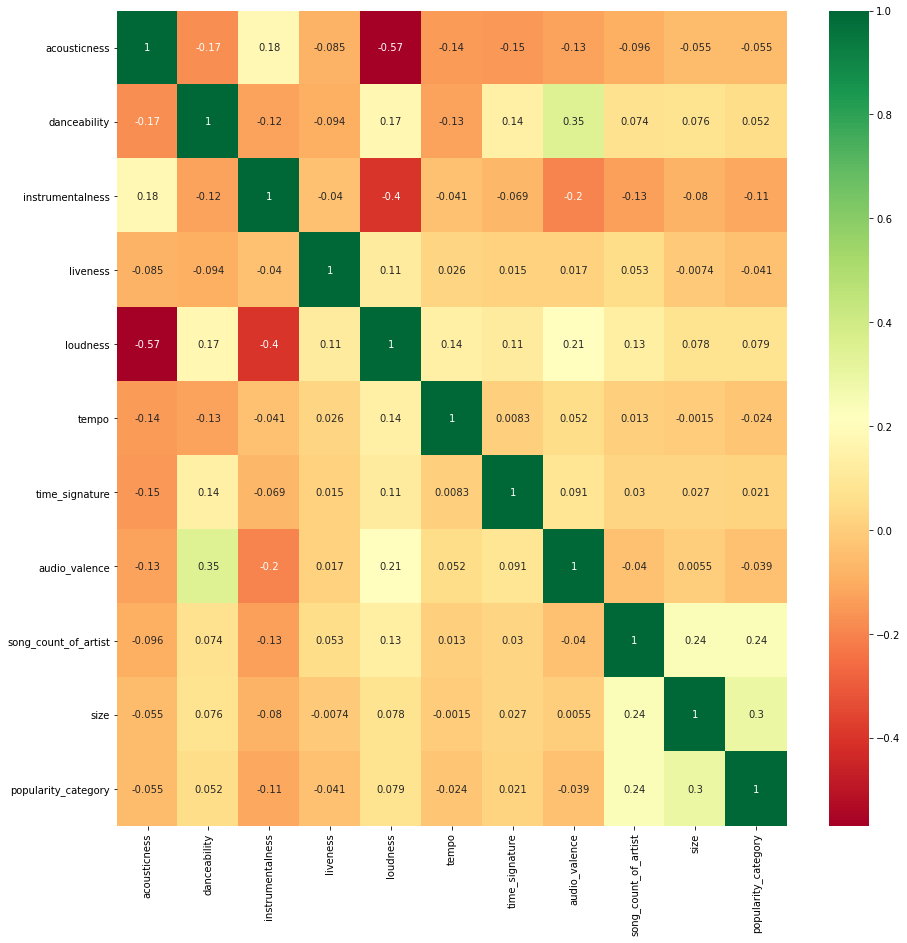

In [76]:


#plot heat map
plt.figure(figsize=(15,15))
g=sns.heatmap(spotifysongs_df_Knn1.corr(),annot=True,cmap="RdYlGn")

##### Indeed it is true a correlation between these features (song_count_artist, size and popularity) exists compared to the others, as a result we would like to give these colums more weight in the KNN model, therefore we will multiply each column by 2.

In [77]:
spotifysongs_df_Knn1["size"] = 2 * spotifysongs_df_Knn1["size"]



In [78]:
spotifysongs_df_Knn1["song_count_of_artist"] = 2 * spotifysongs_df_Knn1["song_count_of_artist"]

In [79]:
spotifysongs_df_Knn1

,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,song_count_of_artist,size,popularity_category
0,0.109437,0.260385,0.000948,0.838991,0.557802,0.592267,0.8,0.290650,0.296296,0.0,0
1,0.000698,0.319149,0.000000,0.272895,0.844026,0.734853,0.8,0.429878,0.000000,0.0,1
2,0.006003,0.559271,0.000000,0.102656,0.854187,0.396091,0.8,0.725610,0.172840,0.0,2
3,0.016063,0.508612,0.107322,0.093426,0.755954,0.462863,0.8,0.593496,0.419753,0.0,2
4,0.614457,0.706180,0.282849,0.052815,0.833594,0.408360,0.8,0.550813,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
14921,0.378513,0.739615,0.000000,0.073018,0.823185,0.449645,0.8,0.524390,0.024691,0.0,0
14922,0.194778,0.620061,0.000000,0.117014,0.659629,0.677036,0.8,0.392276,0.000000,0.0,0
14923,0.745984,0.435664,0.000000,0.424674,0.847446,0.581653,0.8,0.397358,0.000000,0.0,0
14924,0.041063,0.718338,0.000000,0.074864,0.878572,0.516024,0.8,0.523374,0.049383,0.0,3


# ------Discovering the optimal k-value using the 5-fold cross validation method

spliting the dataframe into X group (all the features) and the Y group (target feature, song popularity)

In [80]:
X = spotifysongs_df_Knn1.iloc[:, :-1]  # features
Y = spotifysongs_df_Knn1.iloc[:, -1] #song Popularity

In [81]:
#We will take the test size to be 1/6 of the dataframe
testsize = int((spotifysongs_df_Knn1.shape[0])/6)
testsize

2487

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testsize)

In [83]:
print(spotifysongs_df_Knn1.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print("should be ok")

(14926, 11)
(12439, 10)
(2487, 10)
(12439,)
(2487,)
should be ok


Preforming the 10-fold cross validation on k values 1-21 to discover the optimal k-value
-the larger the fold the more the model can learn from

In [84]:
k_avg_score = [0]*21
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=10)
    k_avg_score[k] = cv_scores.mean()
k_avg_score
print(f"best average accuracy cv score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")


best average accuracy cv score is: 0.37510994042522366, for number of neighbors(K) = 20


## This is clearly not good enough, let us try multiplying the size and artist song count by a factor of 16 total

In [85]:
spotifysongs_df_Knn1["song_count_of_artist"] = 8 * spotifysongs_df_Knn1["song_count_of_artist"]
spotifysongs_df_Knn1["size"] = 8 * spotifysongs_df_Knn1["size"]

In [92]:
X = spotifysongs_df_Knn1.iloc[:, :-1]  # features
Y = spotifysongs_df_Knn1.iloc[:, -1] #song Popularity
testsize = int((spotifysongs_df_Knn1.shape[0])/6)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testsize)
k_avg_score = [0]*35
for k in range(1, 35):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=100)
    print(f'k is {k} cv_scores is {cv_scores.mean()}')
    k_avg_score[k] = cv_scores.mean()
k_avg_score
best = np.argmax(k_avg_score)
print(f"best average accuracy cv score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")


k is 1 cv_scores is 0.34513354838709676
k is 2 cv_scores is 0.3529393548387097
k is 3 cv_scores is 0.3533090322580644
k is 4 cv_scores is 0.36361419354838703
k is 5 cv_scores is 0.3707812903225806
k is 6 cv_scores is 0.375356129032258
k is 7 cv_scores is 0.37890580645161287
k is 8 cv_scores is 0.3820335483870968
k is 9 cv_scores is 0.3835535483870967
k is 10 cv_scores is 0.3844425806451613
k is 11 cv_scores is 0.38653354838709675
k is 12 cv_scores is 0.3897554838709677
k is 13 cv_scores is 0.3936187096774193
k is 14 cv_scores is 0.3945012903225807
k is 15 cv_scores is 0.3937845161290323
k is 16 cv_scores is 0.39232580645161297
k is 17 cv_scores is 0.3926483870967742
k is 18 cv_scores is 0.39530129032258066
k is 19 cv_scores is 0.3989941935483871
k is 20 cv_scores is 0.4032541935483871
k is 21 cv_scores is 0.39955870967741935
k is 22 cv_scores is 0.39835741935483876
k is 23 cv_scores is 0.399561935483871
k is 24 cv_scores is 0.3985206451612903
k is 25 cv_scores is 0.40195741935483875
k 

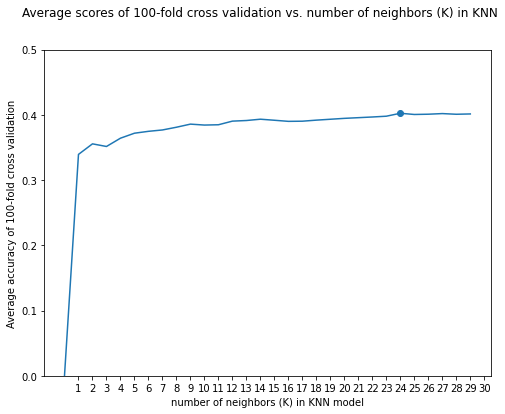

In [87]:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(1, 34));
ax.set_ylim(0, .5)
ax.scatter(np.argmax(k_avg_score), best) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 100-fold cross validation vs. number of neighbors (K) in KNN')
ax.set_xlabel('number of neighbors (K) in KNN model')
ax.set_ylabel('Average accuracy of 100-fold cross validation');

In [94]:
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train, Y_train)


# test the model on the test set
test_score = knn.score(X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

Test accuracy score is: 0.3960595094491355


This is not good enough still, we now will add an aditional piece of information that will hopefully improve our results. We assume that some playlists are more popular than others therefore the songs in them are more popular.

In [122]:
spotifysongs_df_Knn2 = spotifysongs_df_Knn.groupby(spotifysongs_df_Knn.columns.tolist(),as_index=False).size()
spotifysongs_df_Knn2

,song_name,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,artists,popularity_category,song_count_of_artist,size
0,"""40"" - Live Version 1983",1,0.109000,0.257,0.000945,0.8290,-16.259,143.517,4,0.286,U2,0,13,1
1,"""45""",48,0.000696,0.315,0.000000,0.2770,-4.709,178.068,4,0.423,The Gaslight Anthem,1,1,1
2,"""99""",67,0.005980,0.552,0.000000,0.1110,-4.299,95.980,4,0.714,Barns Courtney,2,8,1
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,0.016000,0.502,0.107000,0.1020,-8.263,112.160,4,0.584,David Bowie,2,18,1
4,#CaixaGang,10,0.612000,0.697,0.282000,0.0624,-5.130,98.953,4,0.542,AbJo,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,40,0.377000,0.730,0.000000,0.0821,-5.550,108.957,4,0.516,艾福杰尼,0,2,1
14922,都市森林,24,0.194000,0.612,0.000000,0.1250,-12.150,164.058,4,0.386,Force嘟嘟,0,1,1
14923,비상연락음,37,0.743000,0.430,0.000000,0.4250,-4.571,140.945,4,0.391,IndEgo Aid,0,1,1
14924,빨간 맛 Red Flavor,72,0.040900,0.709,0.000000,0.0839,-3.315,125.042,4,0.515,Red Velvet,3,3,1


In [123]:
songname = list(spotifysongs_df_Knn2["song_name"])
plytlst_df = pd.DataFrame(songname)
plytlst_df
plytlst_df = plytlst_df.rename(columns={0: 'song_name'})


In [124]:
plytlst_df

,song_name
0,"""40"" - Live Version 1983"
1,"""45"""
2,"""99"""
3,"""Heroes"" - Single Version; 2014 Remastered Ver..."
4,#CaixaGang
...,...
14921,通過驗證
14922,都市森林
14923,비상연락음
14924,빨간 맛 Red Flavor


In [125]:
for i in list(song_info_df['playlist']):
    plytlst_df[i] = 0

In [126]:
plytlst_df


,song_name,00s Rock Anthems,100% LatinX,2000s Smash Hits,50 Latin Classics,60s Rock Anthems,70s & 80s Acoustic,70s Rock Anthems,80s Hard Rock,80s Love Songs,...,We Everywhere,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse
0,"""40"" - Live Version 1983",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""45""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""99""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,#CaixaGang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14922,都市森林,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14923,비상연락음,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14924,빨간 맛 Red Flavor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
display(plytlst_df)
for index, row in song_info_df.iterrows():
    sn_name = row['song_name']
    pl_name = row['playlist']
    #print(plytlst_df.loc[plytlst_df['song_name'] == sn_name])lytlst_df.loc[plytlst_df['song_name'] == sn_name]][pl_name] = 
    plytlst_df.loc[plytlst_df.song_name == sn_name,pl_name] = 0.5
    #plytlst_df.loc[plytlst_df.loc[plytlst_df['song_name'] == sn_name]][pl_name] = 1
plytlst_df
   

,song_name,00s Rock Anthems,100% LatinX,2000s Smash Hits,50 Latin Classics,60s Rock Anthems,70s & 80s Acoustic,70s Rock Anthems,80s Hard Rock,80s Love Songs,...,We Everywhere,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse
0,"""40"" - Live Version 1983",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""45""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""99""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,#CaixaGang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14922,都市森林,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14923,비상연락음,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14924,빨간 맛 Red Flavor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,song_name,00s Rock Anthems,100% LatinX,2000s Smash Hits,50 Latin Classics,60s Rock Anthems,70s & 80s Acoustic,70s Rock Anthems,80s Hard Rock,80s Love Songs,...,We Everywhere,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse
0,"""40"" - Live Version 1983",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""45""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""99""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#CaixaGang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14922,都市森林,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14923,비상연락음,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14924,빨간 맛 Red Flavor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
plytlst_df['sum'] = plytlst_df.sum(axis=1)

In [129]:
plytlst_df

,song_name,00s Rock Anthems,100% LatinX,2000s Smash Hits,50 Latin Classics,60s Rock Anthems,70s & 80s Acoustic,70s Rock Anthems,80s Hard Rock,80s Love Songs,...,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse,sum
0,"""40"" - Live Version 1983",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,"""45""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,"""99""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,#CaixaGang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14922,都市森林,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14923,비상연락음,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14924,빨간 맛 Red Flavor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [130]:
plytlst_df.nlargest(10, 'sum')

,song_name,00s Rock Anthems,100% LatinX,2000s Smash Hits,50 Latin Classics,60s Rock Anthems,70s & 80s Acoustic,70s Rock Anthems,80s Hard Rock,80s Love Songs,...,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse,sum
1433,Better,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5
1434,Better,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5
1435,Better,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5
1436,Better,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5
1437,Better,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5
1438,Better,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5
1439,Better,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5
4116,FEFE (feat. Nicki Minaj & Murda Beatz),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5
7873,MIA (feat. Drake),0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12265,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


Here we tried to estimate by how much each vector needs to be normalised, based on the sum of the vector, such that the largest songs "sum" should add up to roughly 1. The value we chose is 0.2 in the end because after testing several options this one gave good results.

In [131]:
plytlst_df.drop(columns='sum')

,song_name,00s Rock Anthems,100% LatinX,2000s Smash Hits,50 Latin Classics,60s Rock Anthems,70s & 80s Acoustic,70s Rock Anthems,80s Hard Rock,80s Love Songs,...,We Everywhere,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse
0,"""40"" - Live Version 1983",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""45""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""99""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#CaixaGang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14922,都市森林,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14923,비상연락음,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14924,빨간 맛 Red Flavor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
spotifysongs_df_Knn3 = spotifysongs_df_Knn2
list(spotifysongs_df_Knn3.columns)

['song_name',
 'song_popularity',
 'acousticness',
 'danceability',
 'instrumentalness',
 'liveness',
 'loudness',
 'tempo',
 'time_signature',
 'audio_valence',
 'artists',
 'popularity_category',
 'song_count_of_artist',
 'size']

In [133]:
p = list(plytlst_df.columns[1:])
p
spotifysongs_df_Knn3 = spotifysongs_df_Knn2

In [134]:
for i in p:
    spotifysongs_df_Knn3[i] = plytlst_df[i]


In [135]:
spotifysongs_df_Knn3.drop_duplicates(subset=['song_name'])

,song_name,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,...,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse,sum
0,"""40"" - Live Version 1983",1,0.109000,0.257,0.000945,0.8290,-16.259,143.517,4,0.286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,"""45""",48,0.000696,0.315,0.000000,0.2770,-4.709,178.068,4,0.423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,"""99""",67,0.005980,0.552,0.000000,0.1110,-4.299,95.980,4,0.714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,"""Heroes"" - Single Version; 2014 Remastered Ver...",58,0.016000,0.502,0.107000,0.1020,-8.263,112.160,4,0.584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,#CaixaGang,10,0.612000,0.697,0.282000,0.0624,-5.130,98.953,4,0.542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,通過驗證,40,0.377000,0.730,0.000000,0.0821,-5.550,108.957,4,0.516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14922,都市森林,24,0.194000,0.612,0.000000,0.1250,-12.150,164.058,4,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14923,비상연락음,37,0.743000,0.430,0.000000,0.4250,-4.571,140.945,4,0.391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14924,빨간 맛 Red Flavor,72,0.040900,0.709,0.000000,0.0839,-3.315,125.042,4,0.515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


We are removing duplicates, songs which have the same name which are different songs. This will mess with our data as they will be counted in each other's playlists

In [136]:
spotifysongs_df_Knn3.describe()

,song_popularity,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,popularity_category,...,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse,sum
count,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,...,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,0.270453,0.624514,0.092067,0.180435,-7.677232,121.105007,3.952968,0.526967,1.243602,...,0.004120,0.002378,0.004254,0.005226,0.001072,0.001976,0.004522,0.005226,0.004623,0.864465
std,20.379465,0.298117,0.158081,0.240451,0.145097,4.018670,29.044644,0.316702,0.247758,1.027406,...,0.045203,0.034404,0.045926,0.050850,0.023127,0.031375,0.047338,0.050850,0.047856,0.802543
min,0.000000,0.000001,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,37.000000,0.023600,0.524000,0.000000,0.093000,-9.389500,98.125000,4.000000,0.332000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,52.000000,0.139000,0.636000,0.000021,0.122000,-6.750500,120.016000,4.000000,0.527000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,63.750000,0.458000,0.740000,0.005105,0.224000,-4.991000,139.940750,4.000000,0.727750,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,0.996000,0.987000,0.997000,0.986000,1.585000,242.318000,5.000000,0.984000,3.000000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,10.500000


In [137]:
spotifysongs_df_Knn3 = spotifysongs_df_Knn3.drop(columns='song_popularity')


In [138]:
list(spotifysongs_df_Knn3.columns)

['song_name',
 'acousticness',
 'danceability',
 'instrumentalness',
 'liveness',
 'loudness',
 'tempo',
 'time_signature',
 'audio_valence',
 'artists',
 'popularity_category',
 'song_count_of_artist',
 'size',
 '00s Rock Anthems',
 '100% LatinX',
 '2000s Smash Hits',
 '50 Latin Classics',
 '60s Rock Anthems',
 '70s & 80s Acoustic',
 '70s Rock Anthems',
 '80s Hard Rock',
 '80s Love Songs',
 '80s Rock Anthems',
 '80s Smash Hits',
 "90's Hip-Hop Don't Stop",
 '90s Acoustic',
 '90s Pop Rock Essentials',
 '90s Rock Anthems',
 'A Perfect Day',
 'A1 Hip-Hop',
 "Abuela's Mix",
 'Acoustic Covers',
 'Acoustic Hits',
 'Acoustic Hits_ Oldies but Goodies',
 'Adrenaline Workout',
 'African Heat',
 'Afropop.csv',
 'All A Cappella',
 'All Aussie Hip-Hop',
 'All Out 00s',
 'All Out 50s',
 'All Out 60s',
 'All Out 70s',
 'All Out 80s',
 'All Out 90s',
 'All The Feels',
 'Alternative 00s',
 'Alternative 10s',
 'Alternative 60s',
 'Alternative 70s',
 'Alternative 80s',
 'Alternative 90s',
 'Alternative 

In [139]:
p = list(spotifysongs_df_Knn3["popularity_category"])

In [140]:
spotifysongs_df_Knn3 = spotifysongs_df_Knn3.drop(columns="popularity_category")

In [141]:
spotifysongs_df_Knn3['popularity_category'] = p

In [142]:
spotifysongs_df_Knn3 = spotifysongs_df_Knn3.drop(columns=["song_name","artists"])

In [143]:
spotifysongs_df_Knn3
p = list(spotifysongs_df_Knn3.columns)
col2norm = p[:10]
col2norm

['acousticness',
 'danceability',
 'instrumentalness',
 'liveness',
 'loudness',
 'tempo',
 'time_signature',
 'audio_valence',
 'song_count_of_artist',
 'size']

In [144]:
spotifysongs_df_Knn3[cols2norm] =  MinMaxScaler().fit_transform(spotifysongs_df_Knn3[cols2norm])
spotifysongs_df_Knn3

,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,song_count_of_artist,size,...,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse,sum,popularity_category
0,0.109437,0.260385,0.000948,0.838991,0.557802,0.592267,0.8,0.290650,0.148148,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
1,0.000698,0.319149,0.000000,0.272895,0.844026,0.734853,0.8,0.429878,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1
2,0.006003,0.559271,0.000000,0.102656,0.854187,0.396091,0.8,0.725610,0.086420,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2
3,0.016063,0.508612,0.107322,0.093426,0.755954,0.462863,0.8,0.593496,0.209877,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2
4,0.614457,0.706180,0.282849,0.052815,0.833594,0.408360,0.8,0.550813,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,0.378513,0.739615,0.000000,0.073018,0.823185,0.449645,0.8,0.524390,0.012346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
14922,0.194778,0.620061,0.000000,0.117014,0.659629,0.677036,0.8,0.392276,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
14923,0.745984,0.435664,0.000000,0.424674,0.847446,0.581653,0.8,0.397358,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
14924,0.041063,0.718338,0.000000,0.074864,0.878572,0.516024,0.8,0.523374,0.024691,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,3


In [145]:
spotifysongs_df_Knn3["size"] = 8 * spotifysongs_df_Knn3["size"]
spotifysongs_df_Knn3["song_count_of_artist"] = 8 * spotifysongs_df_Knn3["song_count_of_artist"]
#weighting the values

In [146]:
# spotifysongs_df_Knn3["size"] = 2 * spotifysongs_df_Knn3["size"]
# spotifysongs_df_Knn3["song_count_of_artist"] = 2 * spotifysongs_df_Knn3["song_count_of_artist"]

KNN-round3, 100-fold cross validations

In [147]:
X = spotifysongs_df_Knn3.iloc[:, :-1]  # features
Y = spotifysongs_df_Knn3.iloc[:, -1] #song Popularity
testsize = int((spotifysongs_df_Knn3.shape[0])/6)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testsize)
k_avg_score = [0]*35
for k in range(1, 35):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=100)
    print(f'k is {k} cv_scores is {cv_scores.mean()}')
    k_avg_score[k] = cv_scores.mean()
k_avg_score
best= np.argmax(k_avg_score)
print(f"best average accuracy cv score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")


k is 1 cv_scores is 0.4341335483870969
k is 2 cv_scores is 0.43799548387096787
k is 3 cv_scores is 0.4507870967741936
k is 4 cv_scores is 0.4679851612903225
k is 5 cv_scores is 0.47226064516129035
k is 6 cv_scores is 0.4730651612903226
k is 7 cv_scores is 0.4786122580645161
k is 8 cv_scores is 0.48335806451612906
k is 9 cv_scores is 0.48447806451612896
k is 10 cv_scores is 0.4878445161290322
k is 11 cv_scores is 0.48809290322580634
k is 12 cv_scores is 0.49049677419354837
k is 13 cv_scores is 0.49178903225806453
k is 14 cv_scores is 0.49203612903225796
k is 15 cv_scores is 0.48728516129032257
k is 16 cv_scores is 0.4883174193548387
k is 17 cv_scores is 0.48928064516129033
k is 18 cv_scores is 0.4880877419354839
k is 19 cv_scores is 0.4926709677419355
k is 20 cv_scores is 0.48912451612903224
k is 21 cv_scores is 0.4925832258064516
k is 22 cv_scores is 0.49001677419354833
k is 23 cv_scores is 0.4933012903225806
k is 24 cv_scores is 0.4900193548387097
k is 25 cv_scores is 0.49025806451612

After preforming our model, we have recieved the results, which we will plot at apply on the test group.

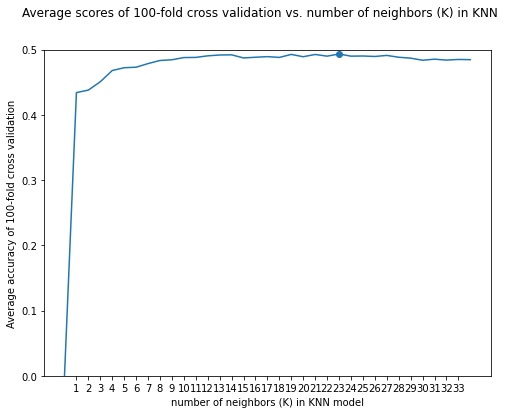

In [148]:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(1, 34));
ax.set_ylim(0, .5)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 100-fold cross validation vs. number of neighbors (K) in KNN')
ax.set_xlabel('number of neighbors (K) in KNN model')
ax.set_ylabel('Average accuracy of 100-fold cross validation');

In [149]:
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train, Y_train)


# test the model on the test set
test_score = knn.score(X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

Test accuracy score is: 0.5118616807398472


We have substantially improved the model, it is a drastic improvement from the base rate of 25%. We have played with the varriables in the matrix several times and the factor by which we weighted the columns 'size' and 'artist song count'. We began with accuracy tests score of 37% so 51% for us is just great. 

Out of curiosity we wanted to check what our accuracy rate would be if we categorised popularity into popular-above the median, and not popular below the median.

In [150]:
p = list(spotifysongs_df_Knn3["popularity_category"])

In [151]:
for i in range(len(p)):
    if p[i] <= 1:
        p[i] = 0
    if p[i] > 1:
        p[i] = 1

In [152]:
spotifysongs_df_Knn4 = spotifysongs_df_Knn3

In [153]:
spotifysongs_df_Knn4.drop(columns="popularity_category")

,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,song_count_of_artist,size,...,Weekend Hangouts,Wild Cards_ Winter Mix,Women of Pop,Workday_ Pop,Workout Groove,Workout Twerkout,You & Me,Young & Free,Your Favorite Coffeehouse,sum
0,0.109437,0.260385,0.000948,0.838991,0.557802,0.592267,0.8,0.290650,1.185185,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,0.000698,0.319149,0.000000,0.272895,0.844026,0.734853,0.8,0.429878,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.006003,0.559271,0.000000,0.102656,0.854187,0.396091,0.8,0.725610,0.691358,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.016063,0.508612,0.107322,0.093426,0.755954,0.462863,0.8,0.593496,1.679012,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,0.614457,0.706180,0.282849,0.052815,0.833594,0.408360,0.8,0.550813,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,0.378513,0.739615,0.000000,0.073018,0.823185,0.449645,0.8,0.524390,0.098765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14922,0.194778,0.620061,0.000000,0.117014,0.659629,0.677036,0.8,0.392276,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14923,0.745984,0.435664,0.000000,0.424674,0.847446,0.581653,0.8,0.397358,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
14924,0.041063,0.718338,0.000000,0.074864,0.878572,0.516024,0.8,0.523374,0.197531,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [154]:
spotifysongs_df_Knn4['popularity_category'] = p

In [155]:
X = spotifysongs_df_Knn4.iloc[:, :-1]  # features
Y = spotifysongs_df_Knn4.iloc[:, -1] #song Popularity
testsize = int((spotifysongs_df_Knn3.shape[0])/6)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testsize)
k_avg_score = [0]*35
for k in range(1, 35):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=100)
    print(f'k is {k} cv_scores is {cv_scores.mean()}')
    k_avg_score[k] = cv_scores.mean()
k_avg_score
best = np.argmax(k_avg_score)
print(f"best average accuracy cv score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")


k is 1 cv_scores is 0.6780361290322579
k is 2 cv_scores is 0.6909025806451612
k is 3 cv_scores is 0.7151025806451614
k is 4 cv_scores is 0.7160793548387094
k is 5 cv_scores is 0.7259664516129033
k is 6 cv_scores is 0.7292619354838711
k is 7 cv_scores is 0.72934
k is 8 cv_scores is 0.7278903225806451
k is 9 cv_scores is 0.7318438709677421
k is 10 cv_scores is 0.729987741935484
k is 11 cv_scores is 0.7364987096774191
k is 12 cv_scores is 0.732392258064516
k is 13 cv_scores is 0.7376135483870968
k is 14 cv_scores is 0.7329516129032256
k is 15 cv_scores is 0.7363316129032256
k is 16 cv_scores is 0.7320716129032258
k is 17 cv_scores is 0.7343251612903225
k is 18 cv_scores is 0.731992258064516
k is 19 cv_scores is 0.7348922580645162
k is 20 cv_scores is 0.7327870967741936
k is 21 cv_scores is 0.734245806451613
k is 22 cv_scores is 0.7327083870967742
k is 23 cv_scores is 0.7340787096774194
k is 24 cv_scores is 0.7332741935483871
k is 25 cv_scores is 0.7352070967741936
k is 26 cv_scores is 0.7

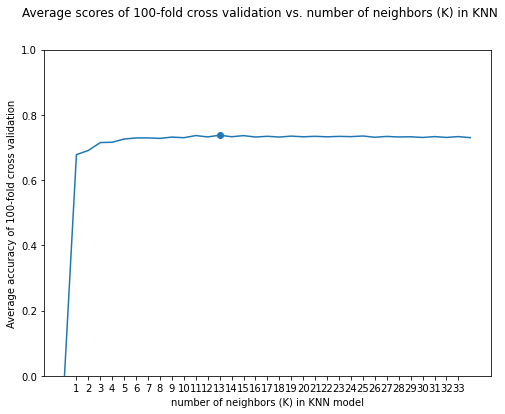

In [158]:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(1, 34));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 100-fold cross validation vs. number of neighbors (K) in KNN')
ax.set_xlabel('number of neighbors (K) in KNN model')
ax.set_ylabel('Average accuracy of 100-fold cross validation');

In [159]:
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train, Y_train)


# test the model on the test set
test_score = knn.score(X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

Test accuracy score is: 0.7362283876156012


Final accuracy test of a 2-categorical popularity rating is 73.6%.